# TP 2 - Bandit Algorithms (November 23)

In this assignement, we will focus on the MultiArmed Bandits problem.
You will implement:


- Deterministic policy UCB1 normal  https://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf or Chapter 7 of Bandit Algorithms

- Boltzmann Exploration (Softmax) https://www.cs.mcgill.ca/~vkules/bandits.pdf

- KL-UCB https://hal.archives-ouvertes.fr/hal-00738209v2 or Chapter 10.2 of Bandits Algorithm

- Best Empirical Sampled Average (BESA) https://hal.archives-ouvertes.fr/hal-01025651v1/document 

- Thompson Sampling Agent  https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf, https://en.wikipedia.org/wiki/Thompson_sampling or Chapter 35 and 36 of Bandits Algorithms


![image not found:](multiarmedbandit.jpg "Bandits")

You will be evaluated on:
* Implementation of the agents. Points will be granted to clean, scalable code.
* A small paragraph with an analysis of the behavior of the agent and your understanding of the algorithm
* Answering this question -> for each implemented agent, give 1 pros and 1 cons ?

Send this notebook  to cyriaque.rousselot@inria.fr before next course.

Good Luck !

## Example : Random Agent and Epsilon Greedy Agent


In `choose`, prescribe how the agent selects its
actions (interact must return an action, that is
an index in `[0, ..., n_a]`).

In `update`, implement how the agent updates
its knowledge, using the newly observed `action` and `reward`.

In [1]:
import runner, environment
import numpy as np

### Agent Definition

In [2]:
class RandomAgent:
    def __init__(self, n_a):
        self.n_a = n_a  # number of possible actions
        """Init a new agent.
        """

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        return np.random.randint(0, self.n_a)

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        pass

In [3]:
class epsGreedyAgent:
    def __init__(self, n_a, epsilon):
        self.n_a = n_a  # number of possible actions
        self.A = range(n_a)
        self.mu = {a: [] for a in self.A}
        self.epsilon = epsilon

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_a)
        else:
            return np.argmax([np.mean(self.mu[a]) for a in self.A])

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[action].append(reward)
        

### Agent Evaluation

There exists two classes from the ```environment``` package, ```environment.EasyEnvironment``` and ```environment.HardEnvironement```. Try the agents on both for your analysis.

The Environment Class takes two arguments: ```n_a``` the number of actions and ```variability```, a parameter between 0 and 1 that influence the spreading of distribution of the reward between bandits.

Simulation step 1:
 ->            action: 6
 ->            reward: 1
 -> cumulative reward: 1.0
Simulation step 2:
 ->            action: 8
 ->            reward: 1
 -> cumulative reward: 2.0
Simulation step 3:
 ->            action: 9
 ->            reward: 0
 -> cumulative reward: 2.0
Simulation step 4:
 ->            action: 9
 ->            reward: 1
 -> cumulative reward: 3.0
Simulation step 5:
 ->            action: 0
 ->            reward: 0
 -> cumulative reward: 3.0
Simulation step 6:
 ->            action: 0
 ->            reward: 0
 -> cumulative reward: 3.0
Simulation step 7:
 ->            action: 8
 ->            reward: 1
 -> cumulative reward: 4.0
Simulation step 8:
 ->            action: 3
 ->            reward: 0
 -> cumulative reward: 4.0
Simulation step 9:
 ->            action: 7
 ->            reward: 1
 -> cumulative reward: 5.0
Simulation step 10:
 ->            action: 9
 ->            reward: 0
 -> cumulative reward: 5.0
Simulation step 11:
 ->            acti

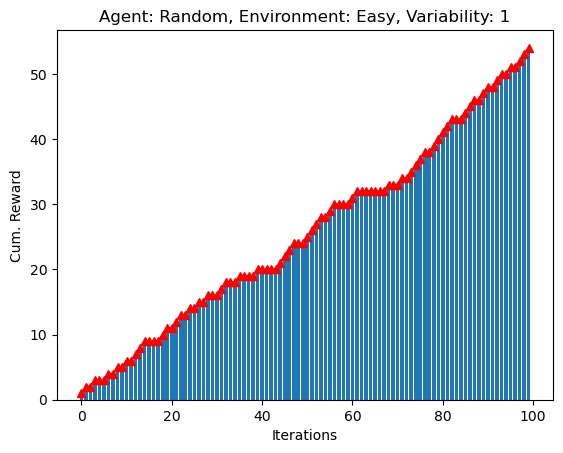

In [4]:
# Looping on a single environement and a single agent
niter = 100
n_actions = 10
my_agent = RandomAgent(n_actions)
my_env = environment.EasyEnvironment(n_actions, variability=1)
my_runner = runner.Runner(
    my_env, my_agent, verbose=True
)  # The verbose parameter allows displaying every step
final_reward, list_cumul = my_runner.loop(niter)
print("Obtained a final reward of {}".format(final_reward))

from matplotlib import pyplot as plt

plt.bar(range(niter),list_cumul)
plt.plot(list_cumul,marker='^',color='red')
plt.xlabel("Iterations")
plt.ylabel("Cum. Reward")
plt.title("Agent: Random, Environment: Easy, Variability: 1")
plt.show()

In [ ]:
# Running a batched simulation with n_agents agents in parallel

niter = 1000
n_agents = 10
n_actions = 10

my_runner = runner.BatchRunner(
    environment.EasyEnvironment, RandomAgent, n_agents, n_actions, False
)
final_reward_rd, list_cumul_rd = my_runner.loop(niter)
print("Random Agent obtained a final average reward of {}".format(final_reward_rd))

In [ ]:
from matplotlib import pyplot as plt

plt.plot(list_cumul_rd, label="Agent: Random")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("Random Agent cumulative reward on one simulation on the EasyEnvironment ")
plt.legend()
plt.show()

You can play with the complexity of the environment by modifying the number of possible actions and variances of the reward distributions . I suggest that you begin with 10 possible actions

In [ ]:
# Running a batched simulation with n_agents agents in parallel

niter = 1000
n_agents = 10
n_actions = 30

my_runner = runner.BatchRunner(
    environment.Environment, RandomAgent, n_agents, n_actions, False
)
final_reward_rd, list_cumul_rd = my_runner.loop(niter)
print("Random Agent obtained a final average reward of {}".format(final_reward_rd))

> Analysis of Epsilon Greedy

### UCB-1

In [ ]:
class UCBAgent:
    # https://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf
    def __init__(self, n_actions):
        self.A = range(n_actions)

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        raise NotImplemented

    def update(self, a, r):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        raise NotImplemented

> Analysis of UCB1

### Boltzmann Exploration (Softmax) 

In [ ]:
class SoftmaxAgent:  # Chose a Temperature between 0.01 and 1
    # https://www.cs.mcgill.ca/~vkules/bandits.pdf
    def __init__(self, n_actions):
        self.A = range(n_actions)

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        raise NotImplemented

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        raise NotImplemented

> Analysis of Boltzmann Exploration

### BESA

In [ ]:
class BesaAgent:
    # https://hal.archives-ouvertes.fr/file/index/docid/1025651/filename/BESA2.pdf
    def __init__(self, n_actions):
        self.A = range(n_actions)

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        raise NotImplemented

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        raise NotImplemented

> Analysis of BESA

### KL-UCB

In [ ]:
class KLUCBAgent:
    # See: https://hal.archives-ouvertes.fr/hal-00738209v2
    def __init__(self, n_actions):
        self.A = range(n_actions)

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        raise NotImplemented

    def update(self, a, r):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        raise NotImplemented

> Analysis of KL-UCB

### Thompson Sampling

> Try first to implement the Bernoulli Bandit Thompson Sampling algorithm on the ```EasyEnvironment```. https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf
Additional points will be granted for a Thompson Agent on the ```HardEnvironment```

In [ ]:
class ThompsonAgent:
    # https://en.wikipedia.org/wiki/Thompson_sampling
    def __init__(self, n_actions):
        self.A = range(n_actions)

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        raise NotImplemented

    def update(self, a, r):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        raise NotImplemented

> Analysis of Thompson Sampling